<a href="https://colab.research.google.com/github/MosaddikHabib/machine-Learning/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Main NoteBook](https://www.kaggle.com/code/namanmanchanda/asl-detection-99-accuracy)


[Data set](https://drive.google.com/drive/folders/1RA2FSmybMlfOnIJKthAttSsvGoYc-Ver?usp=drive_link) Link from Drive

In [36]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
zip_path = '/content/drive/MyDrive/Sign Language Model train/archive.zip'
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [3]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


In [4]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/asl_alphabet_train/asl_alphabet_train' #Fixed: Removed extra 'S'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int) # Use int instead of np.int
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            #Fixed: Use 'folder' instead of appending it to itself
            for image_filename in os.listdir(os.path.join(folder, folderName)):
                img_file = cv2.imread(os.path.join(folder, folderName, image_filename))
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [5]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


In [6]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


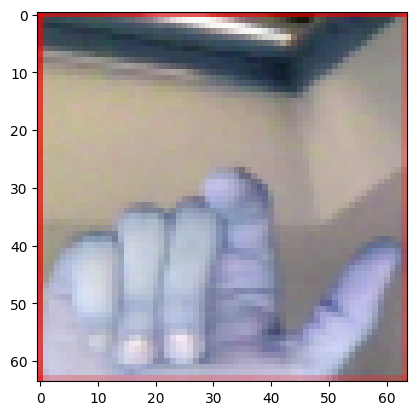

In [7]:
plt.imshow(X_train[0])
plt.show()

In [8]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [10]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [11]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)


(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [12]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

3497

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [14]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_cat_train,
          epochs=10,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
952/952 - 19s - loss: 1.0191 - accuracy: 0.6953 - val_loss: 0.2413 - val_accuracy: 0.9248 - 19s/epoch - 20ms/step
Epoch 2/10
952/952 - 9s - loss: 0.1621 - accuracy: 0.9482 - val_loss: 0.0938 - val_accuracy: 0.9713 - 9s/epoch - 10ms/step
Epoch 3/10
952/952 - 10s - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0622 - val_accuracy: 0.9798 - 10s/epoch - 10ms/step
Epoch 4/10
952/952 - 9s - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0422 - val_accuracy: 0.9882 - 9s/epoch - 10ms/step
Epoch 5/10
952/952 - 10s - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0423 - val_accuracy: 0.9859 - 10s/epoch - 11ms/step
Epoch 6/10
952/952 - 10s - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0368 - val_accuracy: 0.9877 - 10s/epoch - 10ms/step
Epoch 7/10
952/952 - 10s - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0231 - val_accuracy: 0.9922 - 10s/epoch - 11ms/step
Epoch 8/10
952/952 - 9s - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.0287 - val_accuracy: 0.9911 - 9s/epoch - 10ms/step
Epoch 

In [18]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.019055,0.695320,0.241329,0.924789
1,0.162081,0.948227,0.093844,0.971341
2,0.077977,0.976470,0.062227,0.979847
3,0.059217,0.981938,0.042212,0.988161
4,0.041951,0.987471,0.042330,0.985862
5,0.035667,0.989130,0.036756,0.987701
6,0.033135,0.990066,0.023103,0.992222
7,0.024609,0.993268,0.028736,0.991149
8,0.025783,0.991921,0.051495,0.985556


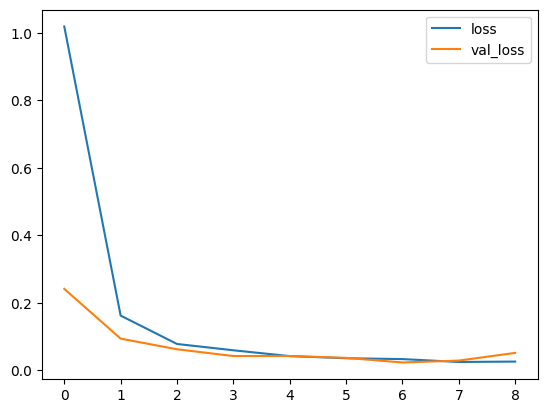

In [20]:
metrics[['loss','val_loss']].plot()
plt.show()

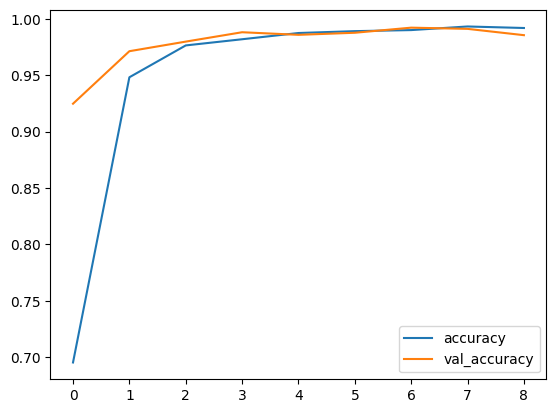

In [21]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [22]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.05149497464299202, 0.9855555295944214]

In [24]:
predictions = model.predict(X_test)  # Get predicted probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with highest probability
print("Predictions done...")

816/816 [==============================] - 2s 2ms/step
Predictions done...


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Now use predicted_classes for classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       900
           1       1.00      1.00      1.00       900
           2       0.99      1.00      0.99       900
           3       0.95      1.00      0.97       900
           4       0.96      1.00      0.98       900
           5       1.00      0.99      0.99       900
           6       0.95      1.00      0.97       900
           7       1.00      0.97      0.98       900
           8       0.98      0.96      0.97       900
           9       1.00      0.97      0.98       900
          10       0.99      0.96      0.98       900
          11       1.00      0.99      0.99       900
          12       0.99      0.96      0.98       900
          13       0.97      0.99      0.98       900
          14       0.98      0.99      0.99       900
          15       1.00      1.00      1.00       900
          16       1.00      1.00      1.00       900
          17       1.00    

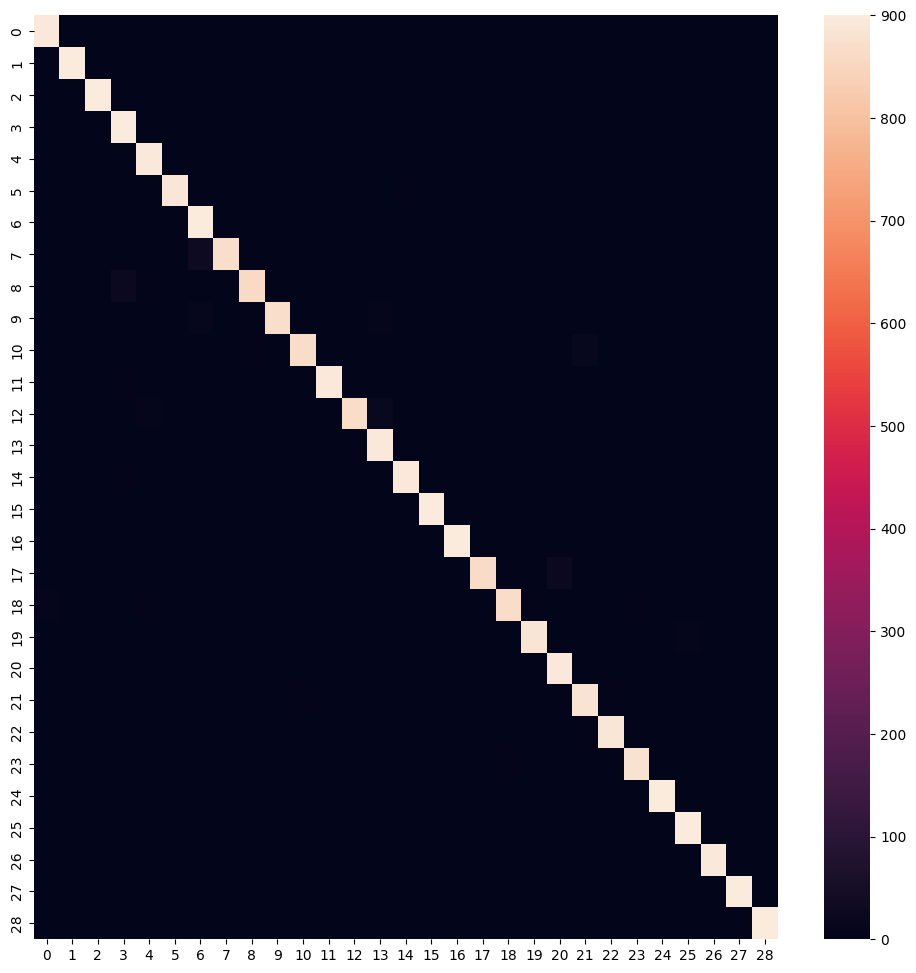

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'predictions' contains probabilities, convert them to class labels:
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predicted_classes)) # Use predicted_classes instead of predictions
plt.show()

In [31]:
# prompt: save and download the model

model.save('/content/asl_model.h5')  # Save the model to a file
from google.colab import files
files.download('/content/asl_model.h5')  # Download the model file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# prompt: count accuracy of this model in 100%

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_classes) * 100
print("Accuracy of the model:", accuracy, "%")


Accuracy of the model: 98.55555555555556 %


In [35]:
# prompt: find the amount the error

error = 100 - accuracy
print("Error rate of the model:", error, "%")


Error rate of the model: 1.4444444444444429 %
